In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import numpy as np

In [78]:
"""
For each digitized plot, produce a monthly and weekly dataframe. 
Monthly will have dates of YYYY-MM-01, weekly will be aligned with the Google Trends weekly dates.
First run WebPlotDigitizer. Then use np.interpolate on the output from WPD to extract daily (or weekly) data points.
Monthly: just average the data points for that month.
Weekly: use the data points corresponding to the Google Trends weekly dates.
"""

'\nFor each digitized plot, produce a monthly and weekly dataframe. \nMonthly will have dates of YYYY-MM-01, weekly will be aligned with the Google Trends weekly dates.\nFirst run WebPlotDigitizer. Then use np.interpolate on the output from WPD to extract daily (or weekly) data points.\nMonthly: just average the data points for that month.\nWeekly: use the data points corresponding to the Google Trends weekly dates.\n'

In [79]:
loc = '../data/raw/digitized/zhao-digitizer-output.csv'
#output_name = 'StewartPBMilk'
output_name = 'Zhao'
#init_data_date = datetime.strptime('2018-11-1', '%Y-%m-%d')
#init_data_date = datetime.strptime('2013-1-13', '%Y-%m-%d')
init_data_date = datetime.strptime('2017-1-6', '%Y-%m-%d')
end_data_date = datetime.strptime('2020-7-9', '%Y-%m-%d')

#end_data_date = datetime.strptime('2018-1-10', '%Y-%m-%d')
df = pd.read_csv(loc, header=None)
df = df.rename(columns={0:'Date', 1:output_name}).sort_values(['Date']).reset_index(drop=True)

In [80]:
df

,Date,Zhao
0,2017/01/06,0.000510
1,2017/01/09,0.000520
2,2017/01/13,0.000524
3,2017/01/26,0.000542
4,2017/02/08,0.000505
...,...,...
156,2020/07/05,0.003838
157,2020/07/06,0.003929
158,2020/07/08,0.004035
159,2020/07/09,0.004143


In [81]:
# Also read in a Google Trends weekly df
animal_welfare_weekly_loc = '../data/raw/gtrends/weekly-6-19-24/confounds/animal welfare-timeline_Glimpse_Google-Trends.csv'

In [82]:
aw_df = pd.read_csv(animal_welfare_weekly_loc).drop(columns=['Unnamed: 0'])
aw_df

,Search Term,animal welfare
0,2004-01-03,36.000000
1,2004-01-10,77.000000
2,2004-01-17,60.000000
3,2004-01-24,86.000000
4,2004-01-31,64.000000
...,...,...
1060,2024-04-27,37.428092
1061,2024-05-04,32.437680
1062,2024-05-11,37.927133
1063,2024-05-18,28.944391


In [83]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
df['Month'] = [tm.month for tm in df['Date']]
df['Year'] = [tm.year for tm in df['Date']]
df['Days'] = [tm.day for tm in df['Date']]
cont_time = []
for tm in df['Date']:
    this_diff = (tm - datetime.strptime('2004-1-1', '%Y-%m-%d')).days
    cont_time.append(this_diff)
df['Cont_Time'] = cont_time

In [84]:
df

,Date,Zhao,Month,Year,Days,Cont_Time
0,2017-01-06,0.000510,1,2017,6,4754
1,2017-01-09,0.000520,1,2017,9,4757
2,2017-01-13,0.000524,1,2017,13,4761
3,2017-01-26,0.000542,1,2017,26,4774
4,2017-02-08,0.000505,2,2017,8,4787
...,...,...,...,...,...,...
156,2020-07-05,0.003838,7,2020,5,6030
157,2020-07-06,0.003929,7,2020,6,6031
158,2020-07-08,0.004035,7,2020,8,6033
159,2020-07-09,0.004143,7,2020,9,6034


(0.0, 0.005)

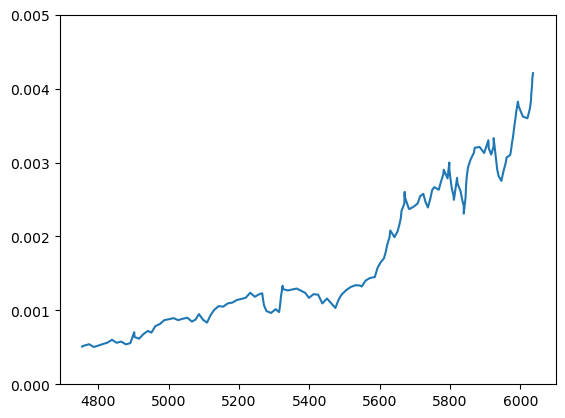

In [103]:
plt.plot(df['Cont_Time'], df[output_name])
#plt.ylim([0, 0.5])
plt.ylim([0, 0.005])

In [86]:
aw_df

,Search Term,animal welfare
0,2004-01-03,36.000000
1,2004-01-10,77.000000
2,2004-01-17,60.000000
3,2004-01-24,86.000000
4,2004-01-31,64.000000
...,...,...
1060,2024-04-27,37.428092
1061,2024-05-04,32.437680
1062,2024-05-11,37.927133
1063,2024-05-18,28.944391


In [87]:
# Interpolation: values in aw_df
init_date = datetime.strptime('2004-1-1', '%Y-%m-%d')
new_values = []
for date in aw_df['Search Term']:
    this_date = datetime.strptime(date, '%Y-%m-%d')
    if (this_date < init_data_date) or (this_date > end_data_date):
        continue
    this_diff = (this_date - init_date).days
    new_values.append(this_diff)
    new_values.append(this_diff+1)
    new_values.append(this_diff+2)
    new_values.append(this_diff+3)
    new_values.append(this_diff+4)
    new_values.append(this_diff+5)
    new_values.append(this_diff+6)

In [88]:
interp = np.interp(new_values, df['Cont_Time'], df[output_name])

In [89]:
interp

array([0.00051333, 0.00051667, 0.00052   , ..., 0.00403459, 0.00414256,
       0.00417575])

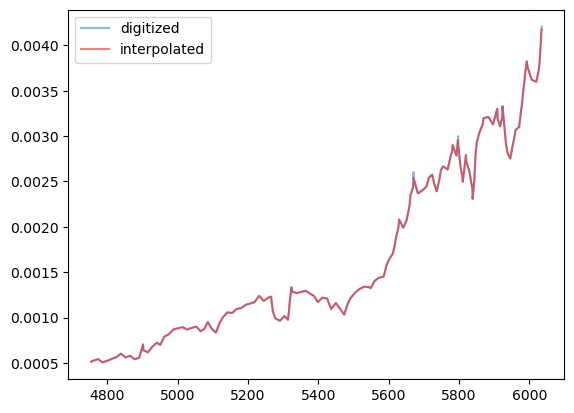

In [90]:
plt.plot(df['Cont_Time'], df[output_name], alpha=0.5, label='digitized')
plt.plot(new_values, interp, color='red', alpha=0.5, label='interpolated')
plt.legend()
#plt.scatter(new_values, interp, s=2, color='red')

In [91]:
# Convert each value of days_elapsed to a date
def convert_time_to_date(days_elapsed, init_date):
    second_date = init_date + timedelta(days=days_elapsed)
    new_date = '{Y}-{m}-{d}'.format(Y=second_date.year,m=second_date.month,d=second_date.day)
    return datetime.strptime(new_date, '%Y-%m-%d')

In [92]:
new_dates = []
months = []
years = []
for new_val in new_values:
    new_date = convert_time_to_date(new_val, init_date)
    month = new_date.month
    year = new_date.year
    new_dates.append(new_date)
    months.append(month)
    years.append(year)

In [93]:
interp_df = pd.DataFrame({'Cont_Time': new_values, 'Date': new_dates, output_name: interp, 'Month': months, 'Year': years})

In [94]:
interp_df

,Cont_Time,Date,Zhao,Month,Year
0,4755,2017-01-07,0.000513,1,2017
1,4756,2017-01-08,0.000517,1,2017
2,4757,2017-01-09,0.000520,1,2017
3,4758,2017-01-10,0.000521,1,2017
4,4759,2017-01-11,0.000522,1,2017
...,...,...,...,...,...
1276,6031,2020-07-06,0.003929,7,2020
1277,6032,2020-07-07,0.003982,7,2020
1278,6033,2020-07-08,0.004035,7,2020
1279,6034,2020-07-09,0.004143,7,2020


In [95]:
aw_df_dates = []
for date in aw_df['Search Term']:
     aw_df_dates.append(datetime.strptime(date, '%Y-%m-%d'))
aw_df['Date'] = aw_df_dates

In [96]:
merged = aw_df.merge(interp_df, on='Date', how='inner')
merged

,Search Term,animal welfare,Date,Cont_Time,Zhao,Month,Year
0,2017-01-07,27.869533,2017-01-07,4755,0.000513,1,2017
1,2017-01-14,30.403127,2017-01-14,4762,0.000526,1,2017
2,2017-01-21,29.136330,2017-01-21,4769,0.000535,1,2017
3,2017-01-28,45.604691,2017-01-28,4776,0.000536,1,2017
4,2017-02-04,63.339848,2017-02-04,4783,0.000516,2,2017
...,...,...,...,...,...,...,...
178,2020-06-06,31.938639,2020-06-06,6001,0.003692,6,2020
179,2020-06-13,33.934804,2020-06-13,6008,0.003620,6,2020
180,2020-06-20,31.938639,2020-06-20,6015,0.003607,6,2020
181,2020-06-27,33.934804,2020-06-27,6022,0.003636,6,2020


In [97]:
weekly = merged[['Date', 'Month', 'Year', output_name]]
weekly

,Date,Month,Year,Zhao
0,2017-01-07,1,2017,0.000513
1,2017-01-14,1,2017,0.000526
2,2017-01-21,1,2017,0.000535
3,2017-01-28,1,2017,0.000536
4,2017-02-04,2,2017,0.000516
...,...,...,...,...
178,2020-06-06,6,2020,0.003692
179,2020-06-13,6,2020,0.003620
180,2020-06-20,6,2020,0.003607
181,2020-06-27,6,2020,0.003636


In [98]:
weekly.to_csv('../data/prepared/digitized/weekly/{o}.csv'.format(o=output_name))

In [99]:
# Now monthly
month_avgs = {'Date': [], 'Year': [], 'Month': [], output_name: []}

for year in interp_df['Year'].unique():
    for month in interp_df.query('Year == @year')['Month'].unique():
        sub_df = interp_df.query('Year == @year and Month == @month')
        mean_val = sub_df[output_name].mean()
        month_avgs['Year'].append(year)
        month_avgs['Month'].append(month)
        month_avgs[output_name].append(mean_val)
        
        this_date = '{y}-{m}'.format(y=year, m=month)
        this_date = datetime.strptime(this_date, '%Y-%m')
        month_avgs['Date'].append(this_date)

In [100]:
monthly = pd.DataFrame(month_avgs)
monthly

,Date,Year,Month,Zhao
0,2017-01-01,2017,1,0.000530
1,2017-02-01,2017,2,0.000518
2,2017-03-01,2017,3,0.000563
3,2017-04-01,2017,4,0.000576
4,2017-05-01,2017,5,0.000568
5,2017-06-01,2017,6,0.000645
6,2017-07-01,2017,7,0.000715
7,2017-08-01,2017,8,0.000825
8,2017-09-01,2017,9,0.000884
9,2017-10-01,2017,10,0.000883


In [101]:
monthly.to_csv('../data/prepared/digitized/monthly/{o}.csv'.format(o=output_name))